In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [4]:
data = pd.read_csv('data/data_clean.csv')
data.shape

(1000, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   spending_score        1000 non-null   int64  
 3   membership_years      1000 non-null   int64  
 4   purchase_frequency    1000 non-null   int64  
 5   preferred_category    1000 non-null   object 
 6   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [4]:
!pip install missingno


In [7]:
import missingno as mn
mn.matrix(data)
mn.bar(data)        # Biểu đồ cột - số lượng giá trị thiếu trên mỗi cột
mn.heatmap(data)    # Tương quan giữa các cột bị thiếu
mn.dendrogram(data) # Gom nhóm các cột có missing value tương tự

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

c:\Users\haidu\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\haidu\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\haidu\anaconda3\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


In [8]:
print(data.shape)
print(data.isnull().sum())


(1000, 7)
age                     0
gender                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [9]:
if data.isnull().values.any():
    import missingno as mn
    mn.matrix(data)
else:
    print("Không có giá trị thiếu trong dữ liệu.")


Không có giá trị thiếu trong dữ liệu.


mấy bước trên là t kiểm tra xem data có bị thiếu hay không 

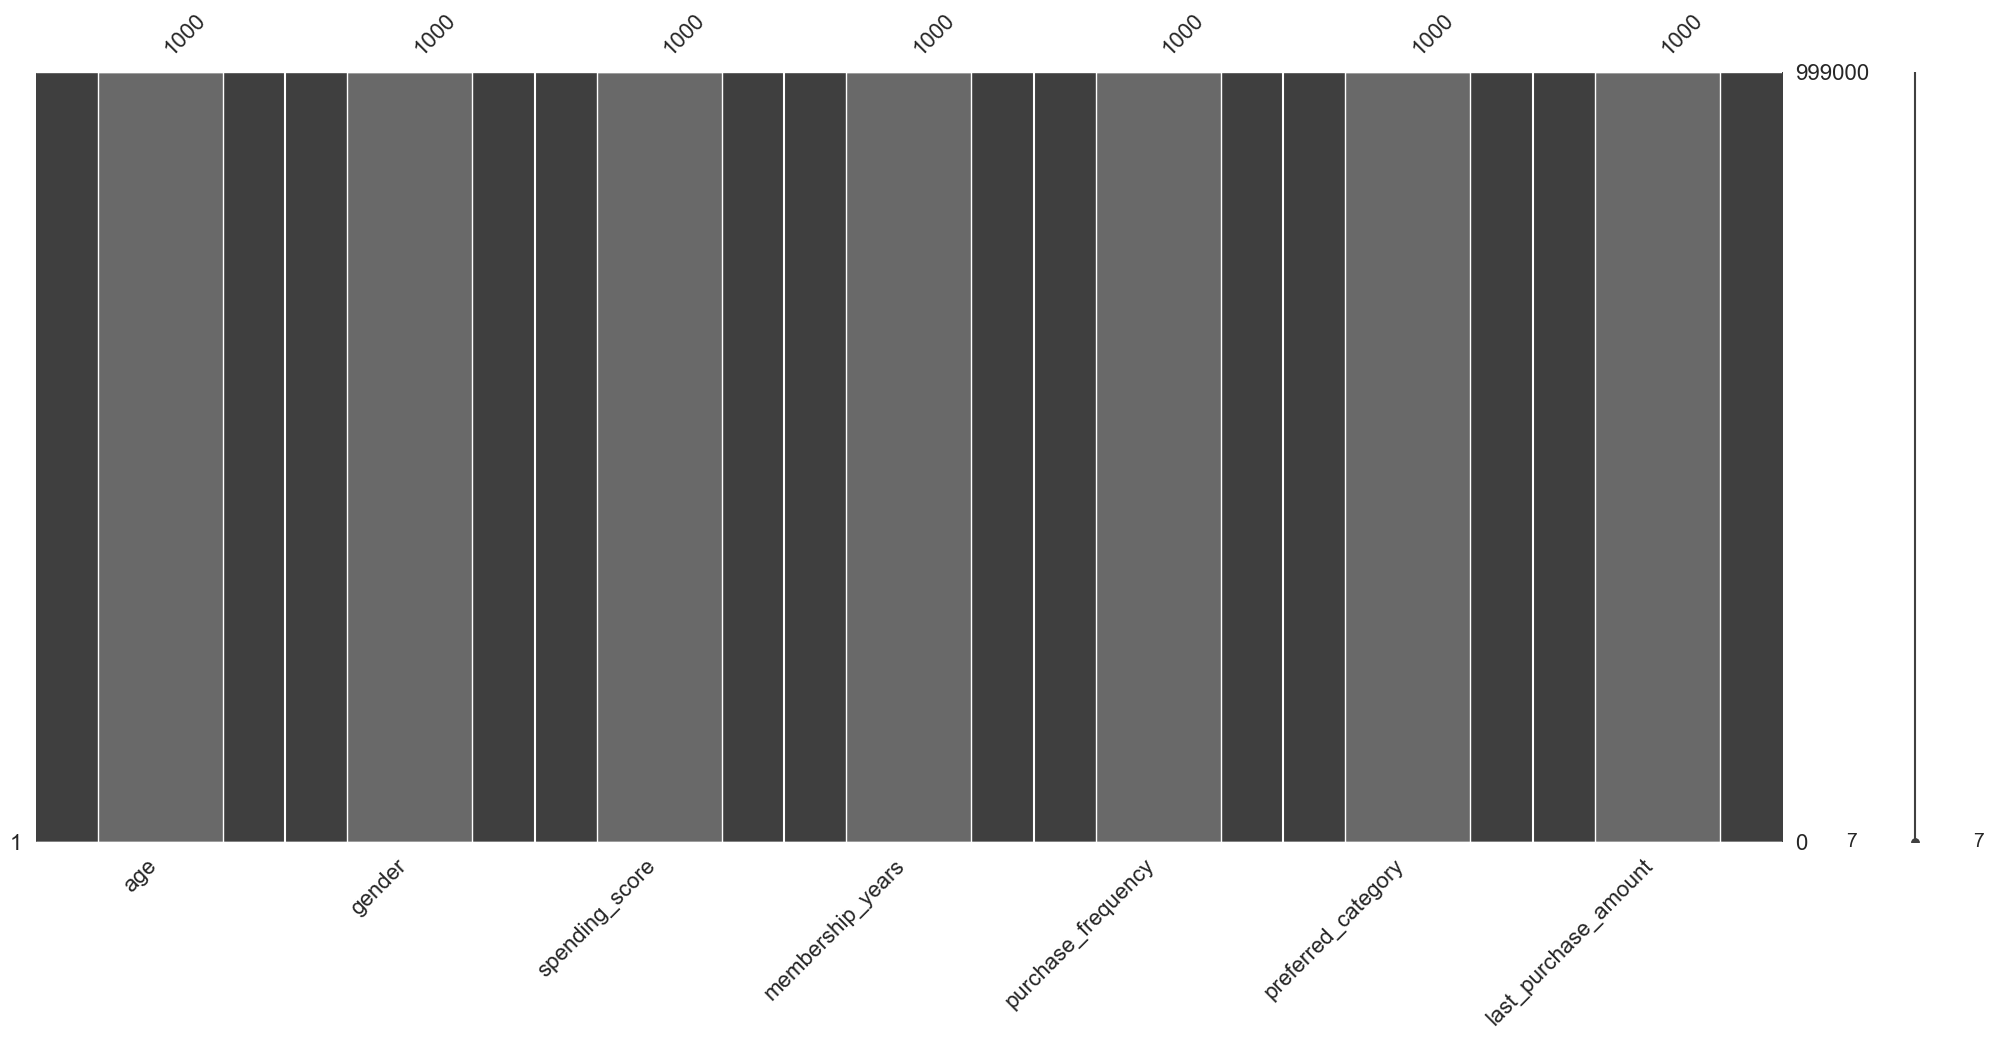

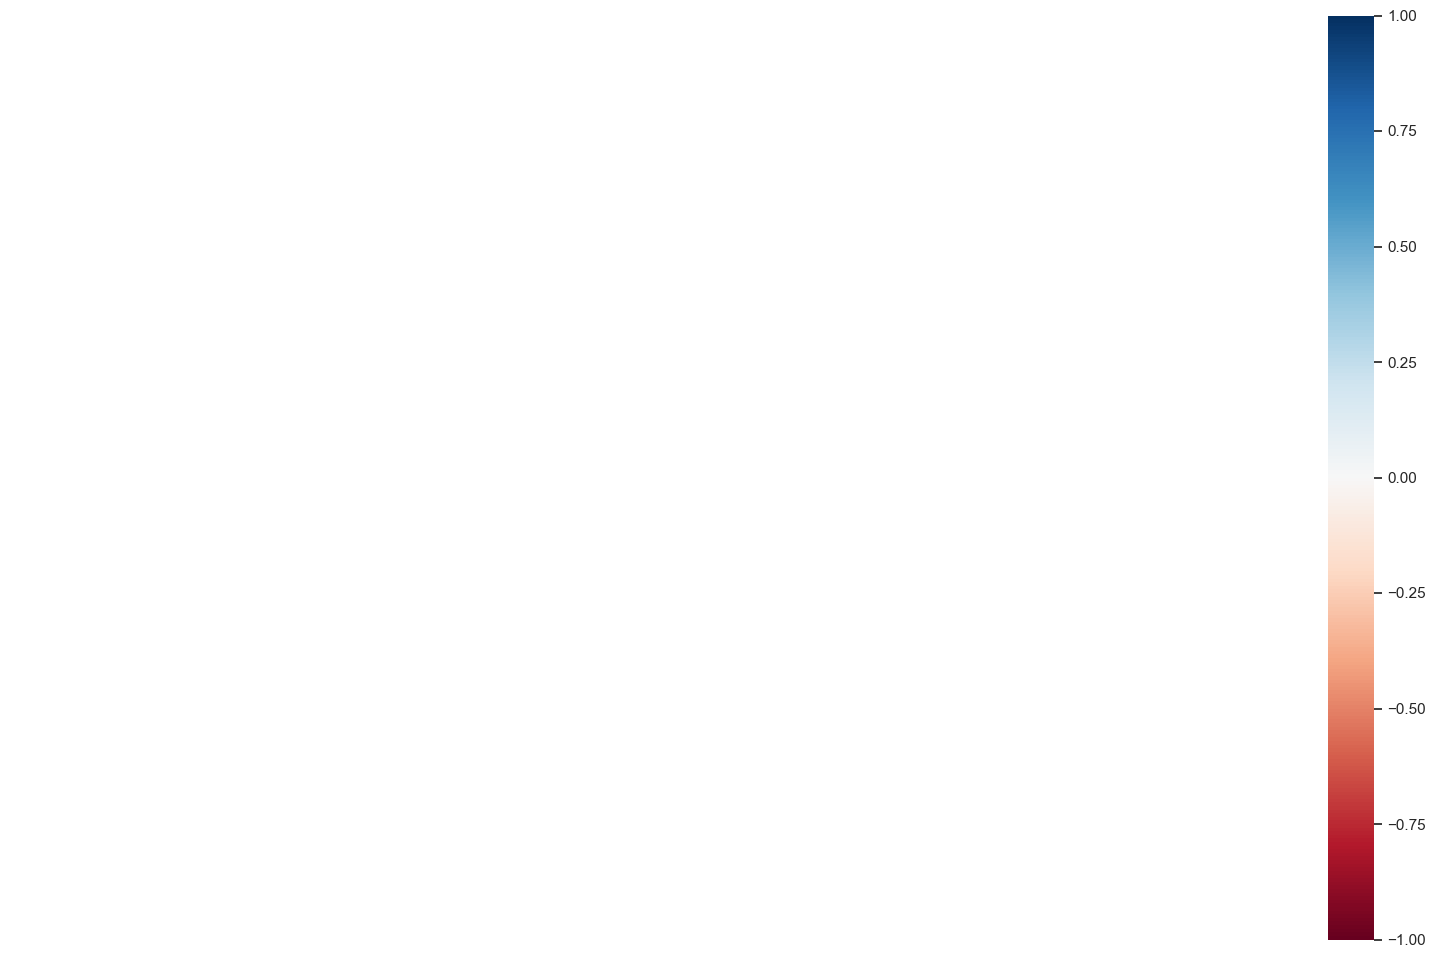

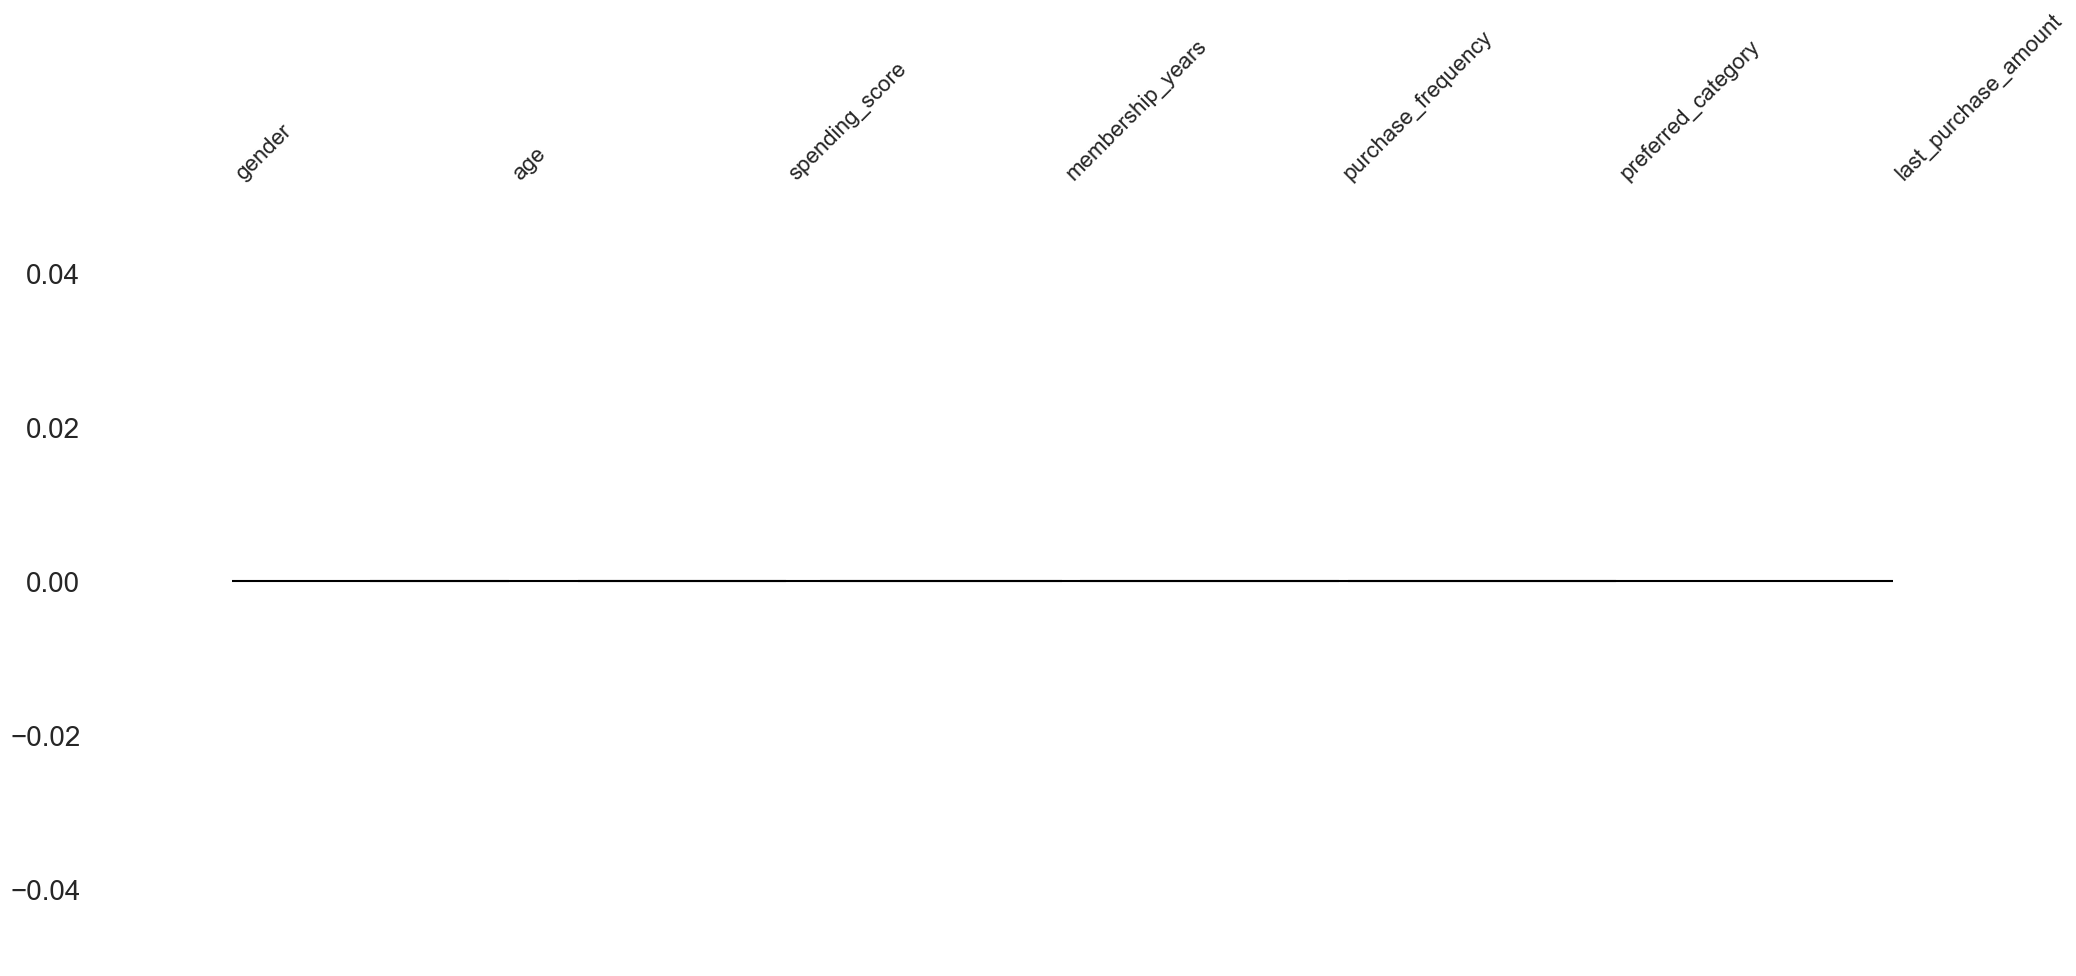

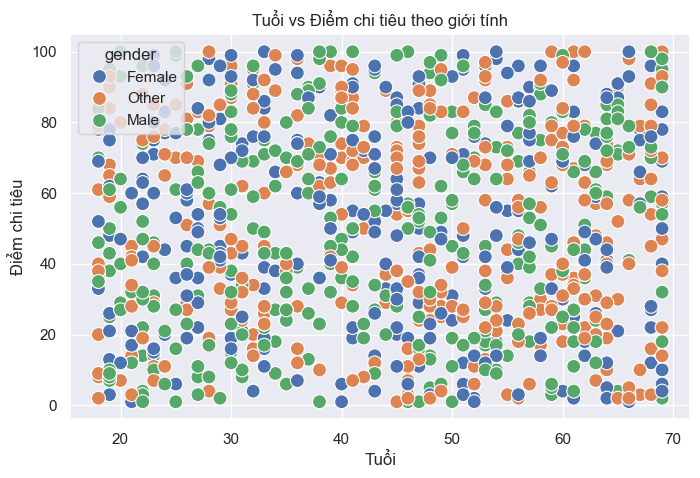

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='age', y='spending_score', hue='gender', s=100)

plt.title("Tuổi vs Điểm chi tiêu theo giới tính")
plt.xlabel("Tuổi")
plt.ylabel("Điểm chi tiêu")
plt.grid(True)
plt.show()

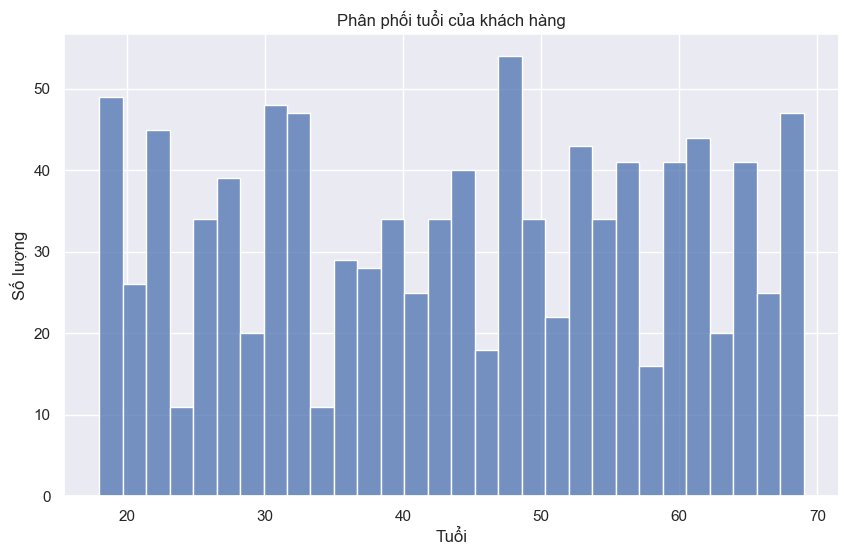

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=30)
plt.title('Phân phối tuổi của khách hàng')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

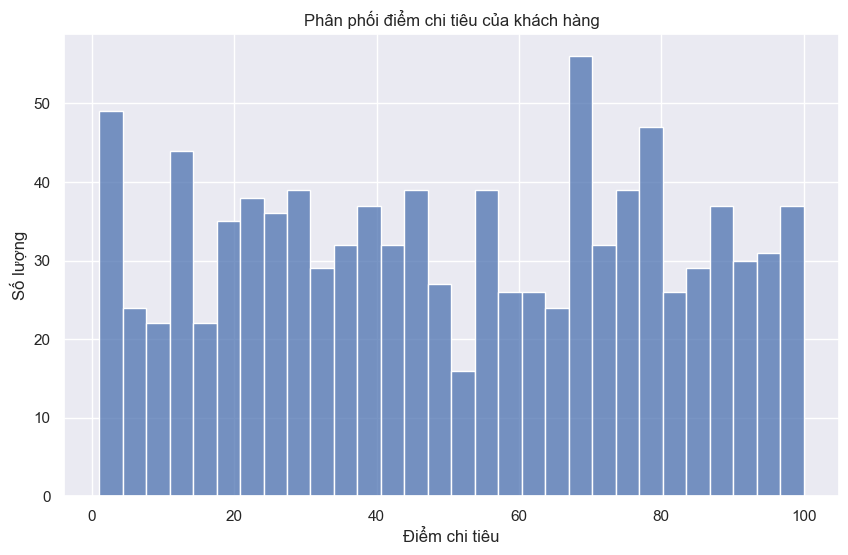

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='spending_score', bins=30)
plt.title('Phân phối điểm chi tiêu của khách hàng')
plt.xlabel('Điểm chi tiêu')
plt.ylabel('Số lượng')
plt.show()

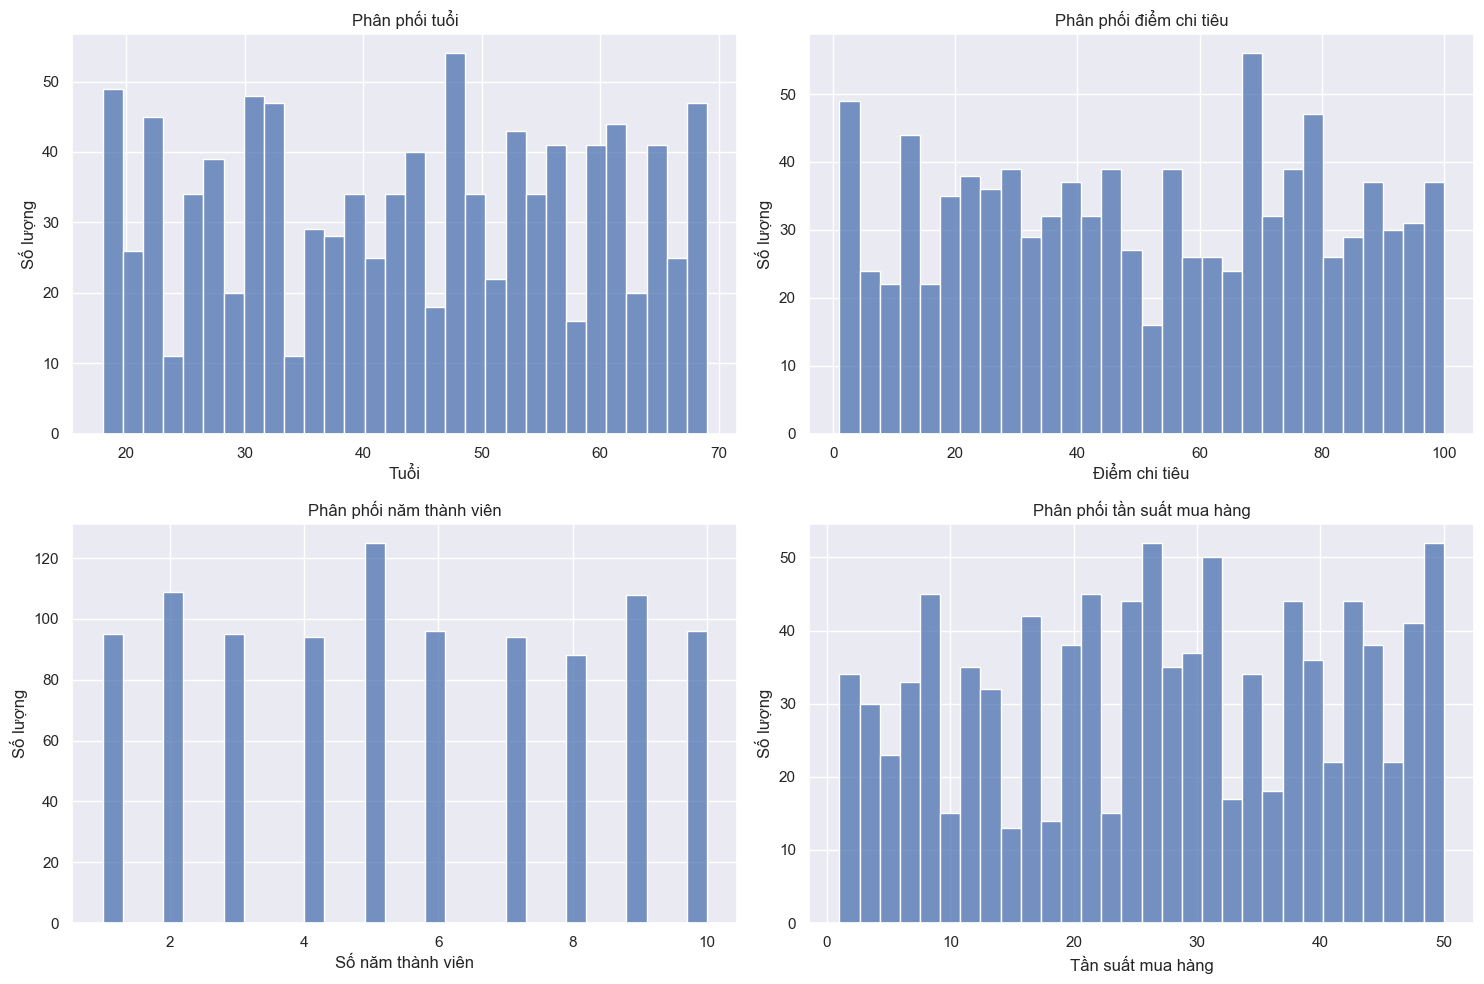

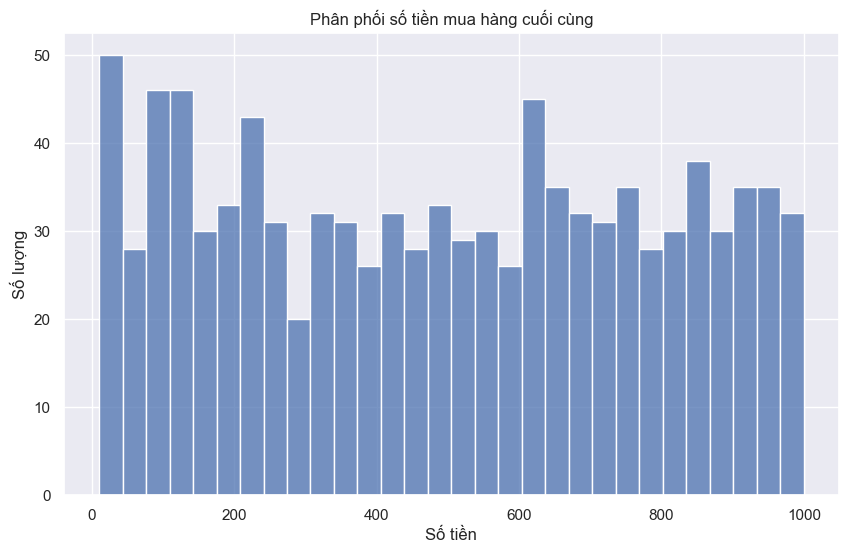

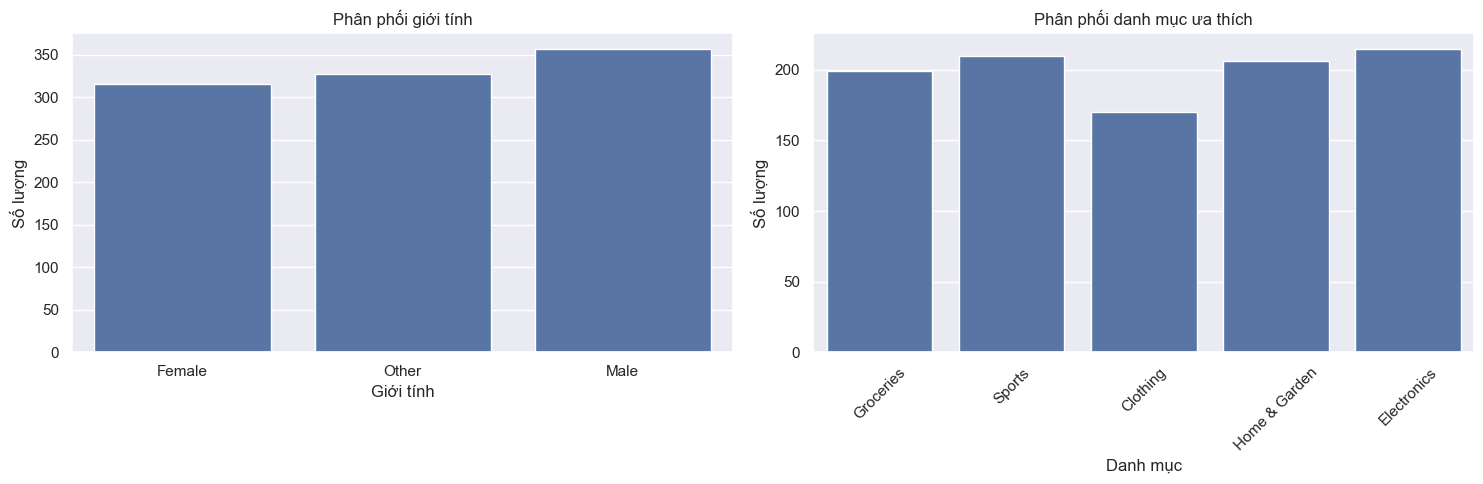


Thống kê mô tả cho các biến số:
               age  spending_score  membership_years  purchase_frequency  \
count  1000.000000     1000.000000        1000.00000         1000.000000   
mean     43.783000       50.685000           5.46900           26.596000   
std      15.042213       28.955175           2.85573           14.243654   
min      18.000000        1.000000           1.00000            1.000000   
25%      30.000000       26.000000           3.00000           15.000000   
50%      45.000000       50.000000           5.00000           27.000000   
75%      57.000000       76.000000           8.00000           39.000000   
max      69.000000      100.000000          10.00000           50.000000   

       last_purchase_amount  
count           1000.000000  
mean             492.348670  
std              295.744253  
min               10.400000  
25%              218.762500  
50%              491.595000  
75%              747.170000  
max              999.740000  

Phân phối g

In [13]:
# Tạo subplot cho tất cả các biến số
plt.figure(figsize=(15, 10))

# 1. Phân phối tuổi
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='age', bins=30)
plt.title('Phân phối tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')

# 2. Phân phối điểm chi tiêu
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='spending_score', bins=30)
plt.title('Phân phối điểm chi tiêu')
plt.xlabel('Điểm chi tiêu')
plt.ylabel('Số lượng')

# 3. Phân phối năm thành viên
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='membership_years', bins=30)
plt.title('Phân phối năm thành viên')
plt.xlabel('Số năm thành viên')
plt.ylabel('Số lượng')

# 4. Phân phối tần suất mua hàng
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='purchase_frequency', bins=30)
plt.title('Phân phối tần suất mua hàng')
plt.xlabel('Tần suất mua hàng')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

# Vẽ biểu đồ phân phối số tiền mua hàng cuối cùng
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='last_purchase_amount', bins=30)
plt.title('Phân phối số tiền mua hàng cuối cùng')
plt.xlabel('Số tiền')
plt.ylabel('Số lượng')
plt.show()

# Vẽ biểu đồ cột cho các biến phân loại
plt.figure(figsize=(15, 5))

# 1. Phân phối giới tính
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='gender')
plt.title('Phân phối giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')

# 2. Phân phối danh mục ưa thích
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='preferred_category')
plt.xticks(rotation=45)
plt.title('Phân phối danh mục ưa thích')
plt.xlabel('Danh mục')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

# In ra các thống kê mô tả
print("\nThống kê mô tả cho các biến số:")
print(data[['age', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].describe())

print("\nPhân phối giới tính:")
print(data['gender'].value_counts())

print("\nPhân phối danh mục ưa thích:")
print(data['preferred_category'].value_counts())

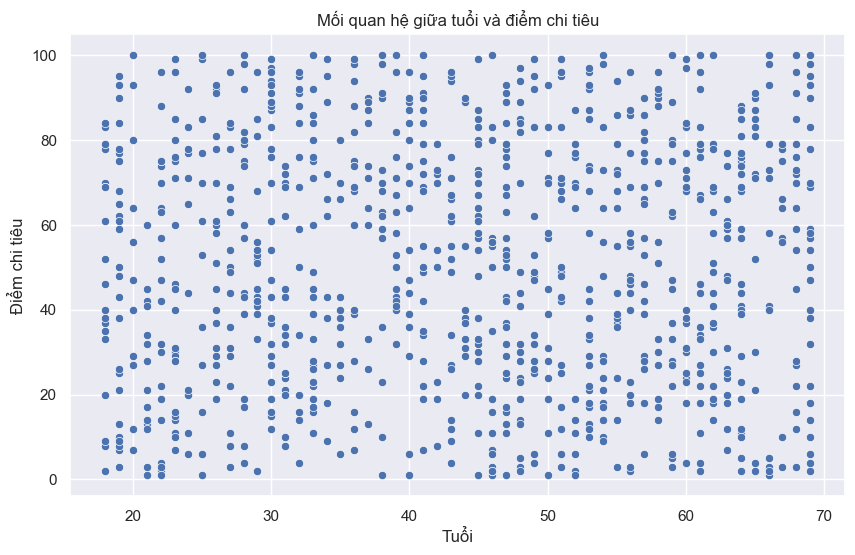

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='spending_score')
plt.title('Mối quan hệ giữa tuổi và điểm chi tiêu')
plt.xlabel('Tuổi')
plt.ylabel('Điểm chi tiêu')
plt.show()

In [15]:
# Chọn các features cho clustering
X = data[['age', 'spending_score']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

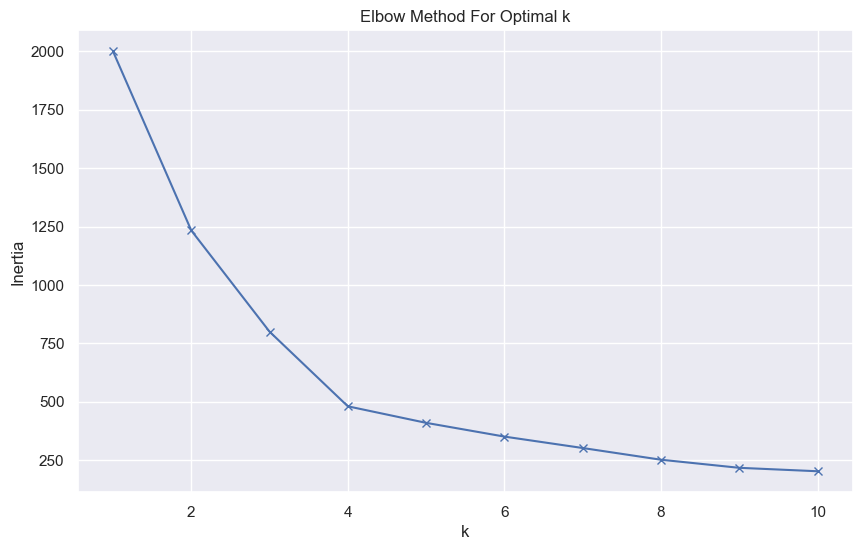

In [16]:
# Tính inertia cho các giá trị k khác nhau
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

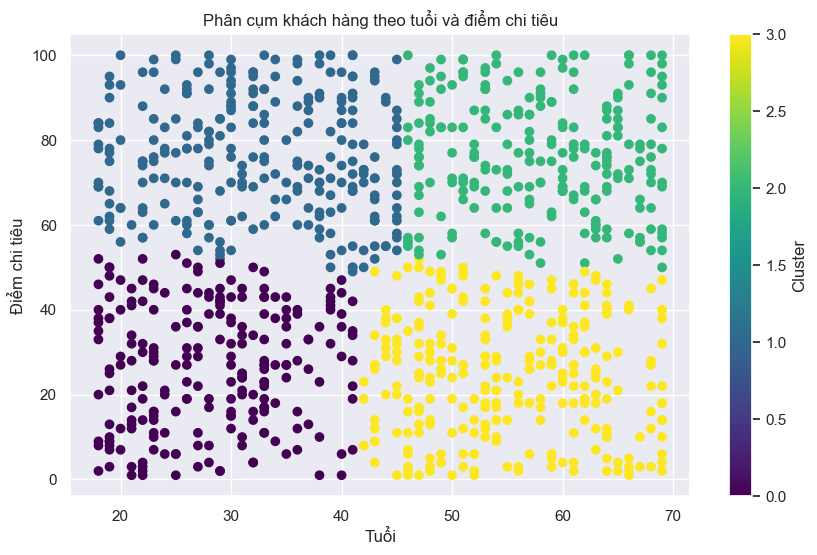

In [17]:
# Thực hiện K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Vẽ kết quả clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['age'], data['spending_score'], c=data['Cluster'], cmap='viridis')
plt.title('Phân cụm khách hàng theo tuổi và điểm chi tiêu')
plt.xlabel('Tuổi')
plt.ylabel('Điểm chi tiêu')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [18]:
# Tính các thống kê cơ bản cho từng cluster
cluster_stats = data.groupby('Cluster').agg({
    'age': ['mean', 'count'],
    'spending_score': 'mean',
    'membership_years': 'mean',
    'purchase_frequency': 'mean',
    'last_purchase_amount': 'mean'
}).round(2)

print("Thống kê các cluster:")
print(cluster_stats)

Thống kê các cluster:
           age       spending_score membership_years purchase_frequency  \
          mean count           mean             mean               mean   
Cluster                                                                   
0        28.20   224          26.69             5.31              26.63   
1        32.47   263          76.27             5.53              27.51   
2        58.01   232          76.19             5.46              26.61   
3        55.05   281          24.81             5.55              25.70   

        last_purchase_amount  
                        mean  
Cluster                       
0                     484.82  
1                     466.05  
2                     524.62  
3                     496.31  


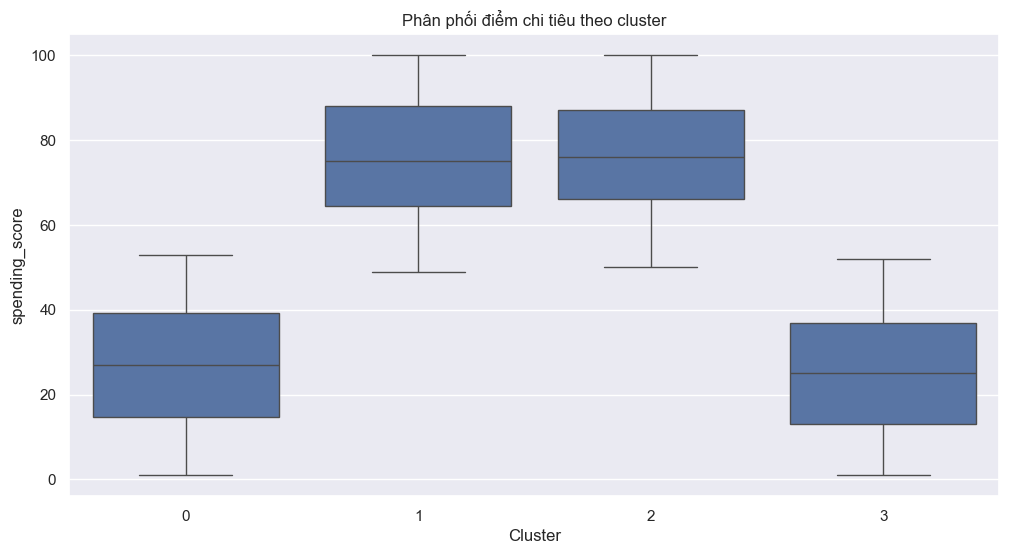

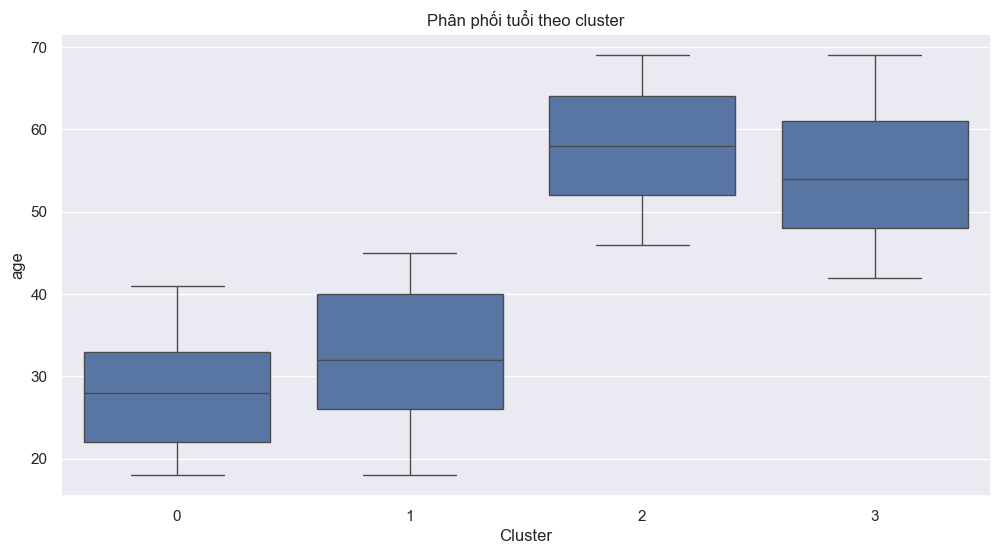

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='spending_score', data=data)
plt.title('Phân phối điểm chi tiêu theo cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='age', data=data)
plt.title('Phân phối tuổi theo cluster')
plt.show()

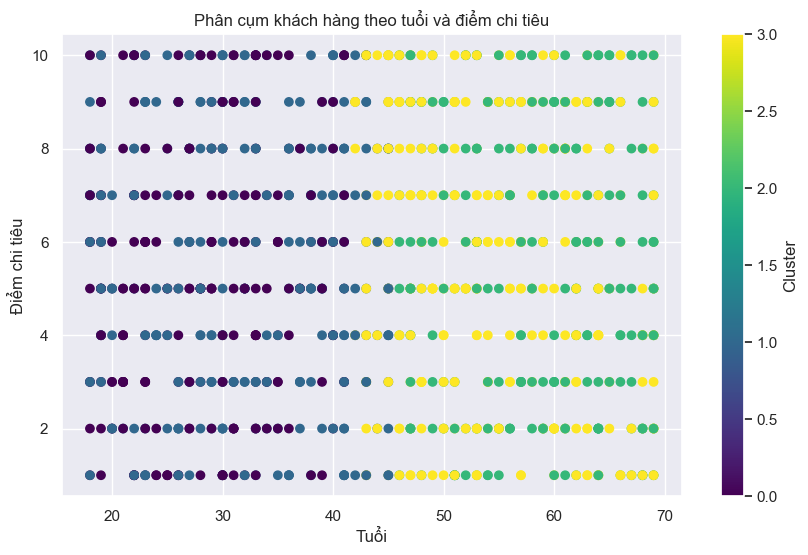

In [25]:
# Thực hiện K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Vẽ kết quả clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['age'], data['membership_years'], c=data['Cluster'], cmap='viridis')
plt.title('Phân cụm khách hàng theo tuổi và điểm chi tiêu')
plt.xlabel('Tuổi')
plt.ylabel('Điểm chi tiêu')
plt.colorbar(scatter, label='Cluster')
plt.show()